In [18]:
## Classical vs Quantum-Inspired Approaches to Solving the Poisson Equation

# This notebook studies the numerical solution of the 1D Poisson equation using classical methods and analyzes how the resulting linear system maps onto quantum linear systems algorithms (HHL-style).

# The goal is to understand scaling, conditioning, and precision requirements.


In [25]:
## Problem setup

# Consider the 1D Poisson equation on the unit interval with Dirichlet boundary conditions:

# -u''(x)=f(x) for x \in (0,1), u(0)=u(1)=0

# We discretize the equation using second-order finite differences.


In [19]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import cg
import time


In [4]:
def poisson_1d_matrix(N):
    h = 1.0 / (N + 1)
    diagonals = [
        -np.ones(N-1),
        2*np.ones(N),
        -np.ones(N-1)
    ]
    A = diags(diagonals, offsets=[-1, 0, 1]) / h**2
    return A

def rhs(N):
    x = np.linspace(0, 1, N+2)[1:-1]
    return np.sin(np.pi * x)


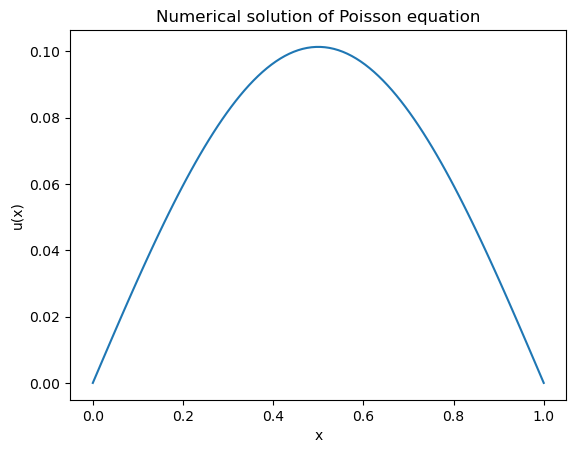

In [7]:
N = 100
A = poisson_1d_matrix(N)
b = rhs(N)

u = np.linalg.solve(A.toarray(), b)

x = np.linspace(0, 1, N+2)
u_full = np.zeros(N+2)
u_full[1:-1] = u

plt.plot(x, u_full)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Numerical solution of Poisson equation")
plt.show()
